In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load cleaned dataset
df = pd.read_csv("./Dataset.csv")  # or your full CSV path
df.shape


(50000, 15)

In [4]:
# Select Features and Target

# Features to use for prediction
features = ['age', 'severity_score_1_10', 'comorbidity_count', 'length_of_stay_days']

# Target variable
target = 'readmission_30d_flag'

X = df[features]
y = df[target]


In [6]:
# Train and Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
# Build and Train Model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Make Predictions

y_pred = model.predict(X_test)


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      7788
           1       0.24      0.12      0.16      2212

    accuracy                           0.72     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.66      0.72      0.68     10000


🧾 Confusion Matrix:


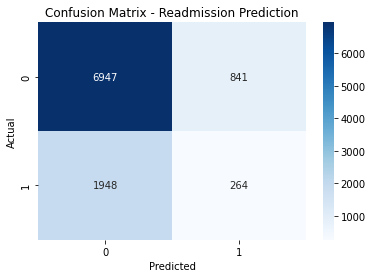

In [9]:
# Evaluate the model

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧾 Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Readmission Prediction")
plt.show()


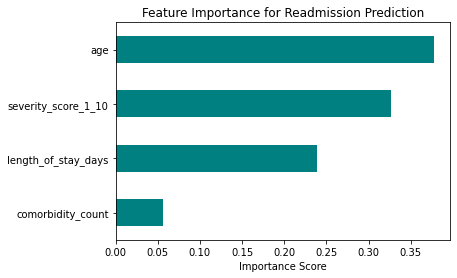

In [12]:
# Features for Tableau 

feat_imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)

plt.figure(figsize=(6, 4))
feat_imp.plot(kind='barh', color='teal')
plt.title("Feature Importance for Readmission Prediction")
plt.xlabel("Importance Score")
plt.show()

## export to CSV for Tableau dashboard
feat_imp.to_csv("./readmission_feature_importance.csv", header=["importance"]) 


In [13]:
X_test_copy = X_test.copy()
X_test_copy["actual"] = y_test.values
X_test_copy["predicted"] = y_pred
X_test_copy.to_csv("./readmission_predictions.csv", index=False)
